In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/gunVoilenceData.csv')

In [4]:
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [5]:
df = df.dropna(subset=['participant_age_group'])

In [6]:
df['participant_age_group'].isna().sum()

0

In [7]:
import re

def parse_age_group(age_group_str):
    age_groups = re.split(r'\|\||\|', age_group_str)
    parsed_dict = {}
    for group in age_groups:
        key, value = re.split(r'::|:', group)
        parsed_dict[int(key)] = value.strip().split()[-1]  # Extract the age group from the end of the string
    return parsed_dict

df['parsed_age_groups'] = df['participant_age_group'].apply(parse_age_group)

age_group_columns = set(group for groups in df['parsed_age_groups'] for group in groups.values())
for column in age_group_columns:
    df['participant_age_group-'+column] = df['parsed_age_groups'].apply(lambda x: list(x.values()).count(column) if column in x.values() else 0)


In [8]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'parsed_age_groups',
       'participant_age_group-18+', 'participant_age_group-12-17',
       'participant_age_group-0-11'],
      dtype='object')

In [9]:
df = df.drop(columns=['parsed_age_groups'])

In [10]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'participant_age_group-18+',
       'participant_age_group-12-17', 'participant_age_group-0-11'],
      dtype='object')

In [11]:
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,participant_age_group-18+,participant_age_group-12-17,participant_age_group-0-11
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,5,0,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,4,0,0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,5,0,0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,4,0,0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,3,1,0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,6,0,0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,2,1,3
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,1,3,0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::Deshaun Jones,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0,6,1,0
10,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,http://www.gunviolencearchive.org/incident/491674,http://www.wrcbtv.com/story/22664154/one-dead-...,False,...,0::Demetrius Davis,NaN,0::Killed||1

In [12]:
def parse_participant_type(participant_type_str):
    types = re.split(r'\|\||\|', participant_type_str)
    parsed_dict = {}
    for entry in types:
        key, value = re.split(r'::|:', entry)
        parsed_dict[int(key)] = value
    return parsed_dict

df['parsed_participant_types'] = df['participant_type'].apply(parse_participant_type)

participant_type_columns = set(participant_type for types in df['parsed_participant_types'] for participant_type in types.values())
for column in participant_type_columns:
    df['participant_type-'+column] = df['parsed_participant_types'].apply(lambda x: list(x.values()).count(column) if column in x.values() else 0)

df = df.drop(columns=['parsed_participant_types'])

In [13]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'participant_age_group-18+',
       'participant_age_group-12-17', 'participant_age_group-0-11',
       'participant_type-Victim', 'participant_type-Subject-Suspect'],
      dtype='object')

In [14]:
df.count()

incident_id                         197558
date                                197558
state                               197558
city_or_county                      197558
address                             183479
n_killed                            197558
n_injured                           197558
incident_url                        197558
source_url                          197138
incident_url_fields_missing         197558
congressional_district              187614
gun_stolen                          115209
gun_type                            115234
incident_characteristics            197321
latitude                            190571
location_description                 34340
longitude                           190571
n_guns_involved                     115234
notes                               132772
participant_age                     147183
participant_age_group               197558
participant_gender                  192716
participant_name                    116003
participant

In [15]:
df['lethal'] = df['n_killed'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_type,sources,state_house_district,state_senate_district,participant_age_group-18+,participant_age_group-12-17,participant_age_group-0-11,participant_type-Victim,participant_type-Subject-Suspect,lethal
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,5,0,0,4,1,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,4,0,0,4,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,5,0,0,3,2,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,4,0,0,3,1,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,3,1,0,3,1,1
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,6,0,0,4,2,1
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,2,1,3,5,1,1
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,1,3,0,4,1,0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0,6,1,0,7,0,1
10,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,http://www.gunviolencearchive.org/incident/491674,http://www.wrcbtv.com/story/22664154/one-dead-...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wrcbtv.com/story/22664154/one-dead-...,28.0,10.0,1,0,0,4,1,1


In [17]:
df['n_guns_involved'].fillna(0, inplace=True)

In [18]:
df['n_guns_involved'].isna().sum()

0

In [19]:
df['n_guns_involved'].count()

197558

In [20]:
df['participant_gender']

0                0::Male||1::Male||3::Male||4::Female
1                                             0::Male
2         0::Male||1::Male||2::Male||3::Male||4::Male
3                0::Female||1::Male||2::Male||3::Male
4              0::Female||1::Male||2::Male||3::Female
                             ...                     
239672                                      0::Female
239673                               0::Male||1::Male
239674                                        0::Male
239675                                        0::Male
239676                             0::Female||1::Male
Name: participant_gender, Length: 197558, dtype: object

In [21]:
# Parse the strings and create separate columns for each participant gender
def parse_participant_gender(participant_gender_str, age_group_str):
    if pd.isna(participant_gender_str):
        len_dict = len(re.split(r'\|\||\|', age_group_str))
        dict_unknown = {}
        for i in range(len_dict):
          dict_unknown[i] = 'Unknown'
        return dict_unknown

    genders = re.split(r'\|\||\|', participant_gender_str)
    parsed_dict = {}
    for entry in genders:
        key, value = re.split(r'::|:', entry)
        parsed_dict[int(key)] = value.split(',')[0]
    return parsed_dict

df['parsed_participant_genders'] = df.apply(lambda row: parse_participant_gender(row['participant_gender'], str(row['participant_age_group'])), axis=1)

# Create separate columns for each participant gender and update counts
participant_gender_columns = set(gender for genders in df['parsed_participant_genders'] for gender in genders.values())
for column in participant_gender_columns:
    df['participant_gender-'+column] = df['parsed_participant_genders'].apply(lambda x: list(x.values()).count(column) if column in x.values() else 0)

# Optional: Drop the intermediate parsed column
df = df.drop(columns=['parsed_participant_genders'])

In [22]:
df[df['participant_gender'].isna()][['participant_gender-Unknown', 'participant_age_group']]

,participant_gender-Unknown,participant_age_group
90,4,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...
144,4,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...
149,1,3::Child 0-11
197,4,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::C...
203,4,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...
...,...,...
239311,1,0::Adult 18+
239377,2,0::Teen 12-17||1::Teen 12-17
239444,1,0::Adult 18+
239459,1,0::Adult 18+


In [23]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'participant_age_group-18+',
       'participant_age_group-12-17', 'participant_age_group-0-11',
       'participant_type-Victim', 'participant_type-Subject-Suspect', 'lethal',
       'participant_gender-Unknown', 'participant_gender-Female',
       'participant_gender-Male'],
      dtype='object')

In [24]:
df.count()

incident_id                         197558
date                                197558
state                               197558
city_or_county                      197558
address                             183479
n_killed                            197558
n_injured                           197558
incident_url                        197558
source_url                          197138
incident_url_fields_missing         197558
congressional_district              187614
gun_stolen                          115209
gun_type                            115234
incident_characteristics            197321
latitude                            190571
location_description                 34340
longitude                           190571
n_guns_involved                     197558
notes                               132772
participant_age                     147183
participant_age_group               197558
participant_gender                  192716
participant_name                    116003
participant

In [25]:
# df.to_csv('gunVoileance-UpdatedInfo.csv', index=False)

In [26]:
# from google.colab import files
# files.download('gunVoileance-UpdatedInfo.csv')

In [27]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [29]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'participant_age_group-18+',
       'participant_age_group-12-17', 'participant_age_group-0-11',
       'participant_type-Victim', 'participant_type-Subject-Suspect', 'lethal',
       'participant_gender-Unknown', 'participant_gender-Female',
       'participant_gender-Male', 'year', 'month', 'day'],
      dtype='object')

In [30]:
df['city_or_county'].mode()

0    Chicago
Name: city_or_county, dtype: object

In [31]:
df['city_or_county'].value_counts()

Chicago                        10332
Baltimore                       3679
New Orleans                     2841
Philadelphia                    2771
Saint Louis                     2083
                               ...  
Sequoyah (county)                  1
Bethel Park                        1
Wiscasset (Westport Island)        1
Denmark (New Denmark)              1
St Paul                            1
Name: city_or_county, Length: 12274, dtype: int64

In [32]:
#Unique states in which the incidents are reported
df['state'].nunique()

51

In [33]:
state_count_info = df['state'].value_counts()
state_count_list = [list(info) for info in zip(state_count_info.values, state_count_info.index)]
print(state_count_list)

[[15600, 'Illinois'], [13815, 'California'], [11540, 'Florida'], [11261, 'Texas'], [8690, 'New York'], [8603, 'Ohio'], [7899, 'Pennsylvania'], [7286, 'Louisiana'], [7244, 'Georgia'], [7157, 'North Carolina'], [6247, 'Tennessee'], [5623, 'South Carolina'], [5306, 'Maryland'], [5122, 'Missouri'], [5004, 'Virginia'], [4935, 'Alabama'], [4900, 'Indiana'], [4850, 'Michigan'], [4786, 'New Jersey'], [4456, 'Massachusetts'], [3683, 'Wisconsin'], [3514, 'Kentucky'], [3170, 'Mississippi'], [2972, 'Washington'], [2557, 'Connecticut'], [2463, 'Arkansas'], [2451, 'Oklahoma'], [2147, 'Colorado'], [1929, 'Arizona'], [1905, 'District of Columbia'], [1809, 'Oregon'], [1738, 'Iowa'], [1634, 'Minnesota'], [1611, 'Nevada'], [1596, 'Kansas'], [1531, 'Delaware'], [1357, 'West Virginia'], [1230, 'Nebraska'], [1193, 'New Mexico'], [1036, 'Alaska'], [883, 'Utah'], [754, 'New Hampshire'], [739, 'Rhode Island'], [655, 'Maine'], [577, 'Idaho'], [501, 'Montana'], [420, 'North Dakota'], [382, 'Vermont'], [367, 'Sou

In [34]:
state_count_list.sort(reverse=True)

In [35]:
print(state_count_list)

[[15600, 'Illinois'], [13815, 'California'], [11540, 'Florida'], [11261, 'Texas'], [8690, 'New York'], [8603, 'Ohio'], [7899, 'Pennsylvania'], [7286, 'Louisiana'], [7244, 'Georgia'], [7157, 'North Carolina'], [6247, 'Tennessee'], [5623, 'South Carolina'], [5306, 'Maryland'], [5122, 'Missouri'], [5004, 'Virginia'], [4935, 'Alabama'], [4900, 'Indiana'], [4850, 'Michigan'], [4786, 'New Jersey'], [4456, 'Massachusetts'], [3683, 'Wisconsin'], [3514, 'Kentucky'], [3170, 'Mississippi'], [2972, 'Washington'], [2557, 'Connecticut'], [2463, 'Arkansas'], [2451, 'Oklahoma'], [2147, 'Colorado'], [1929, 'Arizona'], [1905, 'District of Columbia'], [1809, 'Oregon'], [1738, 'Iowa'], [1634, 'Minnesota'], [1611, 'Nevada'], [1596, 'Kansas'], [1531, 'Delaware'], [1357, 'West Virginia'], [1230, 'Nebraska'], [1193, 'New Mexico'], [1036, 'Alaska'], [883, 'Utah'], [754, 'New Hampshire'], [739, 'Rhode Island'], [655, 'Maine'], [577, 'Idaho'], [501, 'Montana'], [420, 'North Dakota'], [382, 'Vermont'], [367, 'Sou

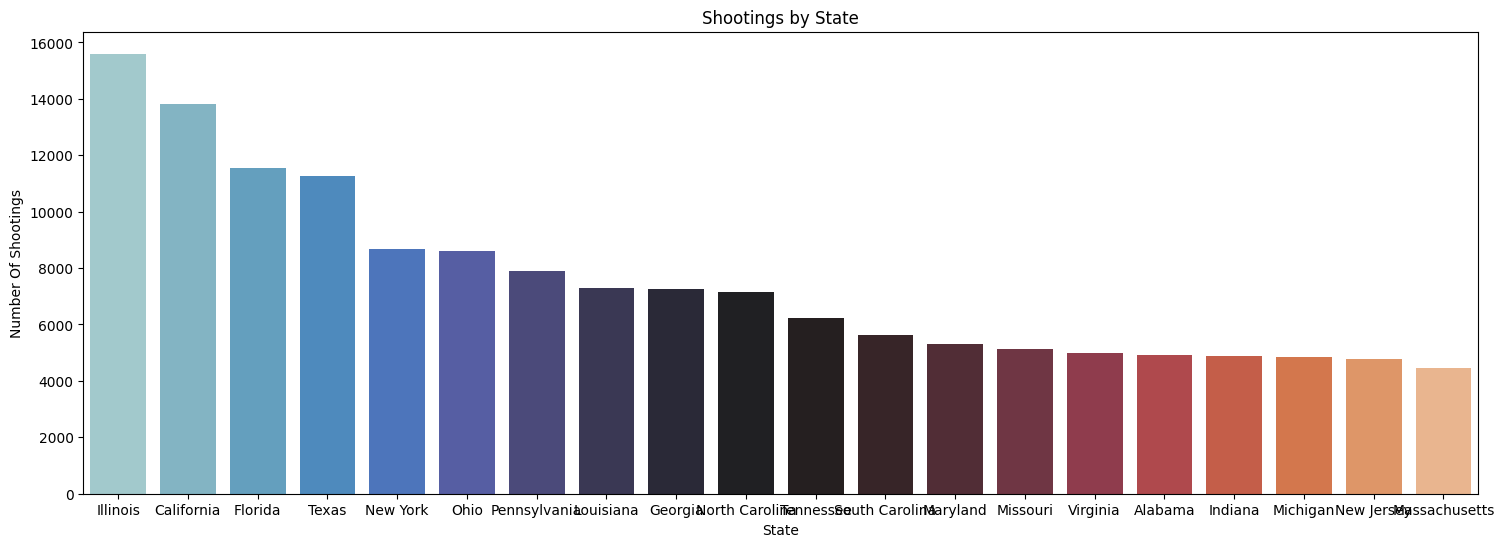

In [39]:
# Top 20 states where the gun voilence has occured
import seaborn as sns
import matplotlib.pyplot as plt

x = [i[1] for i in state_count_list[:20]]
y = [i[0] for i in state_count_list[:20]]

plt.figure(figsize=(18,6))
sns.barplot(x=x,y=y,palette='icefire')
plt.xlabel(xlabel = 'State')
plt.ylabel(ylabel = 'Number Of Shootings')
plt.title(label = 'Shootings by State')
plt.show()

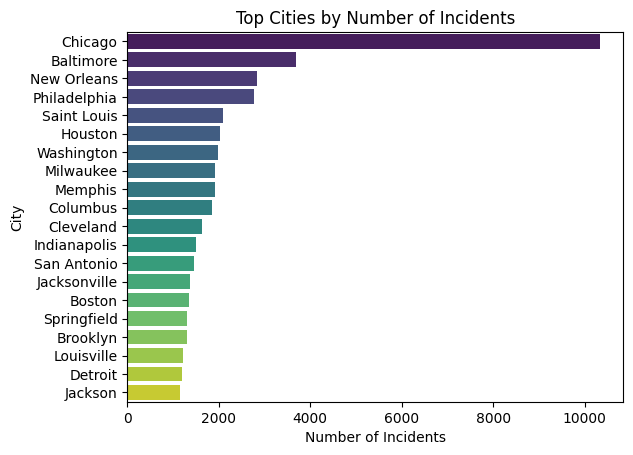

In [45]:
# Number of incidents vs the city the incident occured

incident_counts = df['city_or_county'].value_counts().reset_index(name='incident_count')

# Selecting the top 20 cities by incident count
top_cities = incident_counts.head(20)

sns.barplot(x='incident_count', y='index', data=top_cities, palette='viridis')
plt.xlabel('Number of Incidents')
plt.ylabel('City')
plt.title('Top Cities by Number of Incidents')
plt.show()
